# Prevendo o valor de aluguel de um imóvel com Machine Learning

Projeto de Machine Learning para criação de uma API onde preverá o valor de da aluguel de um imóvel apenas imputando as características do imóvel desejado.

Eu não tenho propriedade de nenhum desses dados, todos eles foram retirados de informações disponíveis gratuitamente na internet e compilados apenas para facilitar o acesso. Estão disponível do site https://www.kaggle.com/. Você terá acesso diretamento aos dados no [link](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent).

O dataset possui dados de 10962 casas para alugar com 13 classes diferentes.

Pergunta a ser respondido ao final do treinamento do modelo de Machine Learning: Qual o valor do aluguel da sua casa?

In [1]:
# Algumas Libs e configurações utilizadas na exploração e analise dos dados

import pandas as pd
import numpy as np

# Libs gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Ignora alguns avisos iníteis (como uma função obsoleta por exemplo) 
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# Exploração dos dados

In [2]:
# Lendo os dados
dados = pd.read_csv('houses_to_rent.csv')

In [3]:
# Dimensões do dados
dados.shape

(10692, 13)

In [4]:
# Visualização prévia dos dados
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Da esquerda para a direita temos as seguintes colunas: city (cidade onde o imóvel está localizada), area (área do imóvel), rooms (número de quartos), bathroom (número de banheiros), parking spaces (número de vagas de garagem), floor (andar), animal (aceita animais?), furniture (mobilhada?), hoa (valor do condomínio), rent amount (valor do aluguel), property tax (IPTU), fire insurance (seguro contra incêndio), total (total a ser pago, hoa + rent + tax + fire).

In [5]:
# Removeremos a fire insurance e coluna total, pois ela não nos interessa para o treinamendo do modelo, queremos prever o valor do aluguel (rent amount)
dados.drop(columns=['fire insurance (R$)','total (R$)'], inplace=True)

In [6]:
dados.shape

(10692, 11)

In [7]:
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [8]:
# Campos vazios
dados.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

Os dados não apresenta campos vazios

In [9]:
# Visualizando dados duplicados
dados.duplicated().sum()

360

Podemos observar que temos um total de 358 entradas de dados duplicadas, o interressando que elas sejam excluidas para não "atrapalhar" no treinamento do modelo.

In [10]:
dados[dados.duplicated()]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
244,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0
920,Belo Horizonte,40,1,1,1,2,not acept,furnished,0,970,0
1060,São Paulo,136,3,3,3,13,acept,not furnished,1430,4206,364
1064,São Paulo,20,1,1,0,5,acept,furnished,602,1800,130
1108,Campinas,184,4,3,4,-,acept,not furnished,0,3240,220
...,...,...,...,...,...,...,...,...,...,...,...
10569,Belo Horizonte,20,1,1,1,-,acept,furnished,0,1100,0
10579,São Paulo,30,1,1,0,-,not acept,not furnished,0,1000,0
10623,Porto Alegre,47,1,1,1,1,not acept,furnished,400,2200,0
10640,São Paulo,27,1,1,0,5,not acept,not furnished,1405,3500,1


In [11]:
# Excluindo os dados duplicados
dados = dados.drop_duplicates()

In [12]:
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [13]:
# Campos únicos
dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [14]:
# tipos das colunas
dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

# Análise Exploratória de Dados (EDA)

In [15]:
# Filtrando as colunas em numéricas e categóricas

colunas_categoricas = dados.columns[dados.dtypes == object]
colunas_numericas = dados.columns[dados.dtypes != object]

In [16]:
# Categóricas
colunas_categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [17]:
# Numéricas
colunas_numericas

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)'],
      dtype='object')

### Análise dos campos categóricos

In [18]:
# Mostrando quantos porcentos cada entrada única da coluna, tem dos dados totais.
dados['city'].value_counts(normalize=True)*100

São Paulo         55.313589
Rio de Janeiro    13.850174
Belo Horizonte    11.701510
Porto Alegre      11.169183
Campinas           7.965544
Name: city, dtype: float64

Notamos que mais de 50% (55.32%) dos imovéis são na cidade de São Paulo

In [19]:
# Fazendo a mesma análise percentual para todas as colunas categóricas
for col in colunas_categoricas:
    analise = dados[col].value_counts(normalize=True)*100
    print(col, '\n', analise, '\n')

city 
 São Paulo         55.313589
Rio de Janeiro    13.850174
Belo Horizonte    11.701510
Porto Alegre      11.169183
Campinas           7.965544
Name: city, dtype: float64 

floor 
 -      22.928765
1       9.678668
2       9.214092
3       8.662408
4       7.036392
5       5.613628
6       5.129694
7       4.723190
8       4.703833
9       3.484321
10      3.406891
11      2.864886
12      2.468060
13      1.887340
14      1.626016
15      1.384050
16      1.045296
17      0.919473
18      0.716221
19      0.512969
20      0.416183
21      0.406504
22      0.232288
23      0.222609
25      0.183895
24      0.174216
26      0.125823
27      0.077429
28      0.048393
29      0.048393
32      0.019357
35      0.009679
46      0.009679
301     0.009679
51      0.009679
Name: floor, dtype: float64 

animal 
 acept        78.164925
not acept    21.835075
Name: animal, dtype: float64 

furniture 
 not furnished    75.658149
furnished        24.341851
Name: furniture, dtype: float64 



### Observações:

* Na coluna floor (número de andares, temos uma entrada simbolizada por um tracinho (-), correspondendo a quase 23% dos dados. Não temos informações sobre o que seja, pode ser que represente o térreo, ou seja, sejam casas e não prédios/apartamentos. Com isso, subtituiremos esse simpleo pelo número 0, simbolizando um imóvel no térreo.
* Ainda na coluna floor, podemos ver que temos um imóvel no 301º andar, possivelmente também foi um erro na inserção do dado, pode ser que seja o 30º andar, ou seja, também iremos fazer essa mudança.

In [20]:
# Correção dos dados da coluna floor

# Ajustando o imóvel do 310º andar 

dados.loc[dados['floor'] == '301']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [21]:
dados.iloc[2562, 5] = '30'

In [22]:
# Ajustando o tracinhos '-' para '0'

dados['floor'] = dados['floor'].apply(lambda registro: 0 if registro == '-' else registro)

In [23]:
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [24]:
dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

A coluna floor é categórica como podemos ver na célula anterior, no entando são números que representam os andares, com isso, iremos transformar ela para numérica, pois elas será importante no treinamento do modelo.

Iremos fazer coisa similar para a coluna animal e furniture.

In [25]:
# Transformando a coluna 'floor' para númerico
dados['floor'] = pd.to_numeric(dados['floor'])

# Transformando as coluna 'animal' que é categorica em númerica, 'acept': 1 e 'not acept': 0
dados['animal'] = dados['animal'].map({'acept': 1, 'not acept': 0})

# Transformando as coluna 'furniture' que é categorica em númericas, 'furniture': 1 e 'not furniture': 0
dados['furniture'] = dados['furniture'].map({'furnished': 1, 'not furnished': 0})

In [26]:
dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                 int64
animal                int64
furniture             int64
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

### Iremos visualizar gráficamente os dados das colunas numéricas (as que são numéricas originais do dataset 'colunas_numericas')

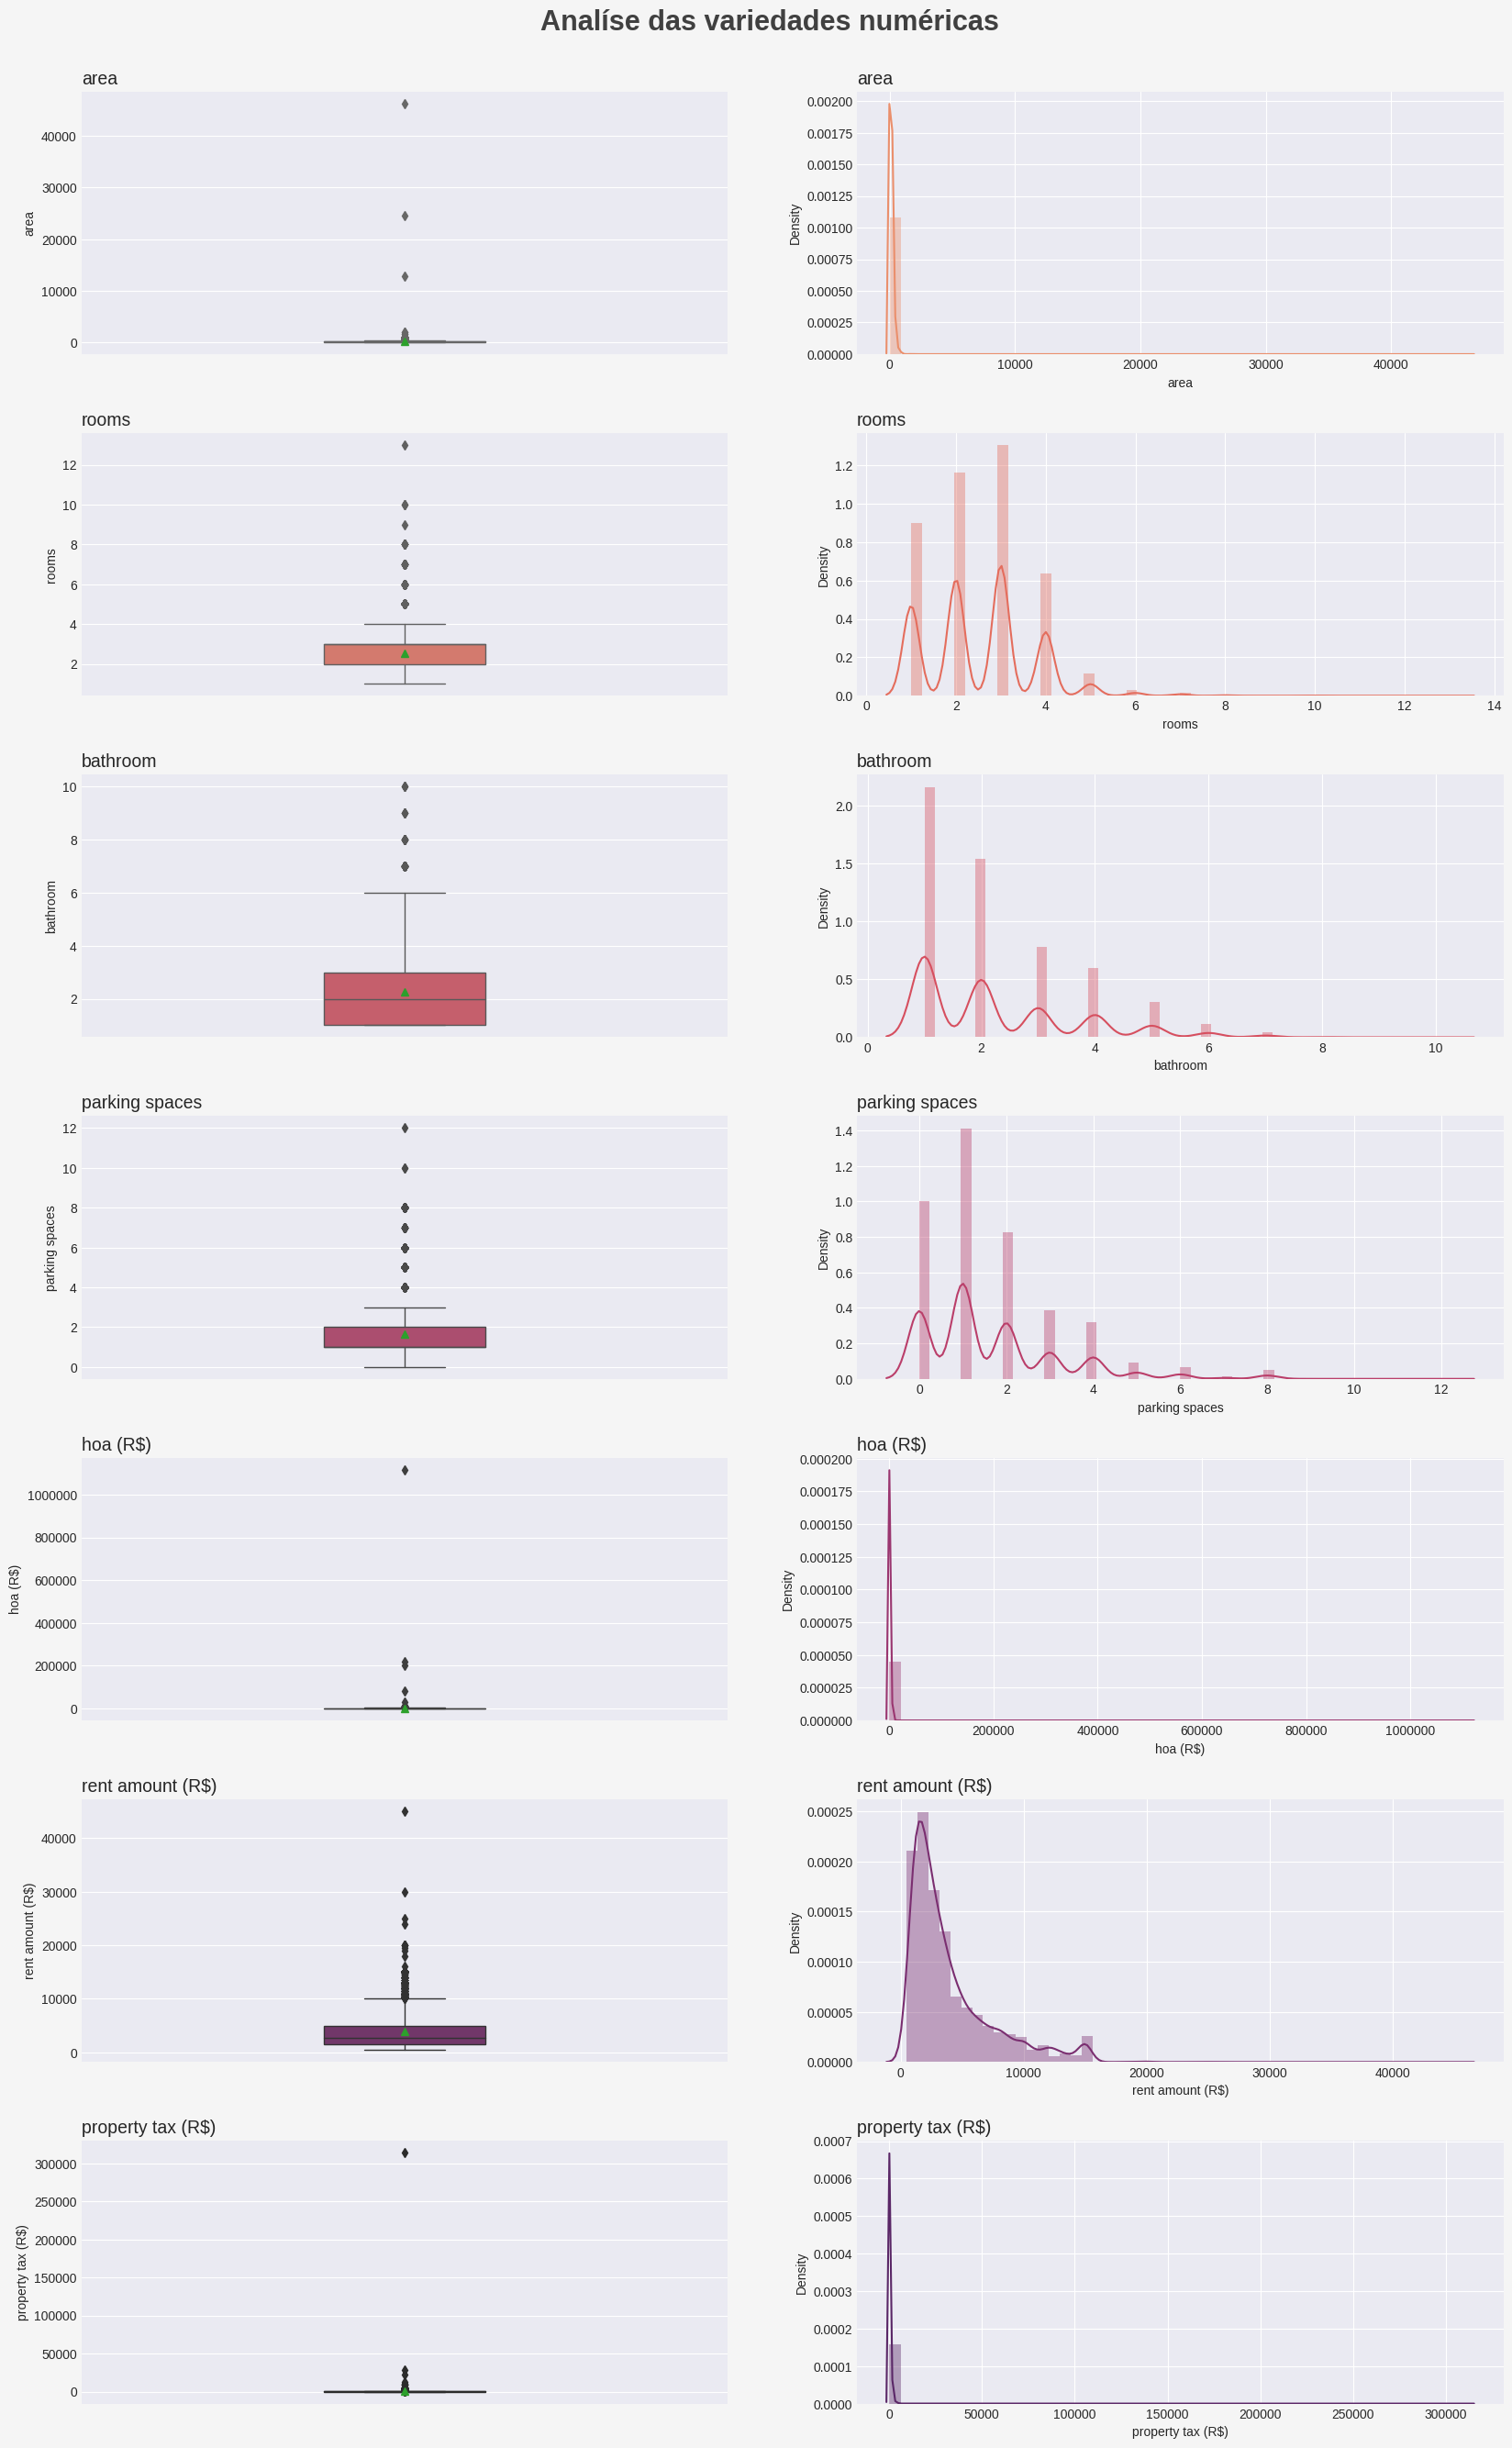

In [27]:
# Grid - gráficos

# Tamanho
figura, eixo = plt.subplots(figsize=(20, 30))

# Cor de fundo
cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

# Paleta de cores
paleta_cores = sns.color_palette('flare', len(colunas_numericas)*2)

# Titulo
plt.suptitle('Analíse das variedades numéricas', fontsize=22, color='#404040', fontweight=600)

# Estrutura
linhas = len(colunas_numericas)  # Todas as informações numéricas
colunas = 2  #(boxplot - distplot)
posicao = 1  # Posição inicial do grid

# For plotar os gráficos
for col in colunas_numericas:
    # plot no grid -- boxplot
    plt.subplot(linhas, colunas, posicao)
    
    # Plot
    plt.title(f'{col}', loc='left', fontsize=14, fontweight=200)
    sns.boxplot(data=dados, y=col, showmeans=True, saturation=0.75, linewidth=1, color=paleta_cores[posicao], width=0.25)
    
    # mudar a posição
    posicao += 1
    
    # plot no grid -- distplot
    plt.subplot(linhas, colunas, posicao)
    
    # Plot
    plt.title(f'{col}', loc='left', fontsize=14, fontweight=200)
    sns.distplot(dados[col], color=paleta_cores[posicao-1])
    
    # mudar a posição
    posicao += 1
    
# ajustar os grid
plt.subplots_adjust(top=0.95, hspace=0.3)

Como podemos observar nos gráficos da esquerdar (boxplot), temos alguns dados que ficaram de fora do área que envolve o gráfico. Não temos certeza ainda, mas podemos está diante de alguns outliers (valores atípico ou resultado que foge da média). Iremos analizar cada um dos casos, e iremos tratar o dado da melhor maneira possível, pois se confirmar ser um outlier e levarmos ele para o tratamento do modelo, podemos ter resultados incoerentes com a realidade.

### Area

In [28]:
dados['area'].describe()

count    10332.000000
mean       152.462156
std        545.925981
min         11.000000
25%         59.000000
50%         95.000000
75%        190.000000
max      46335.000000
Name: area, dtype: float64

Temos mean = 152.439423, é max = 46335.000000, ou seja, temos valores que fogem muito da média.

In [29]:
dados['area'].sort_values(ascending=False).head(20)

2397     46335
5915     24606
9241     12732
5129      2000
8790      2000
654       1600
4813      1600
3559      1100
2423      1020
640       1000
6615      1000
3052      1000
10184     1000
9857      1000
1250      1000
2831       999
143        999
4139       999
5877       999
2055       998
Name: area, dtype: int64

In [30]:
# Analisando individualmente as aréa que fogem muito da média, que também pode ser visto no gráfico

dados.loc[2397]

city                 Belo Horizonte
area                          46335
rooms                             4
bathroom                          8
parking spaces                    5
floor                            11
animal                            1
furniture                         1
hoa (R$)                        960
rent amount (R$)               8500
property tax (R$)               646
Name: 2397, dtype: object

Como podemos ver, temos um imovém de 4 quartos, 8 banheiros, 5 vagas  e foi computado uma area de 46335, não parece um dado coerente com a realidade.

In [31]:
# Outro teste

dados.loc[9241]

city                 Campinas
area                    12732
rooms                       3
bathroom                    2
parking spaces              0
floor                       3
animal                      1
furniture                   0
hoa (R$)                  700
rent amount (R$)         1600
property tax (R$)          96
Name: 9241, dtype: object

Novamente temos uma área muito grande para os cômodos que o imóvel apresenta.

#### Substituiremos os imovéis com area >= 1000 pela média dos dados

In [32]:
dados.loc[dados['area'] < 1000]['area'].describe()

count    10317.000000
mean       143.088689
std        129.150726
min         11.000000
25%         59.000000
50%         94.000000
75%        190.000000
max        999.000000
Name: area, dtype: float64

In [33]:
dados.loc[dados['area'] >= 1000]['area'].describe()

count       15.000000
mean      6599.533333
std      12768.695206
min       1000.000000
25%       1000.000000
50%       1100.000000
75%       2000.000000
max      46335.000000
Name: area, dtype: float64

In [34]:
# Substituindo registros de area >= 1000 pela média
dados['area'] = dados['area'].apply(lambda registro: int(dados['area'].mean()) if registro >= 1000 else int(registro))

In [35]:
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22
4,São Paulo,25,1,1,0,1,0,0,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,0,1,402,1478,24
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,0,1,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,1,1,1585,12000,279


### Rooms

In [36]:
dados['rooms'].describe()

count    10332.000000
mean         2.540263
std          1.168102
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64

Por essa descrição e pelo gráfico, apesar de termos pontos de 'outliers', mas são valores possível de quantidade de quartos para um imóvel, iremos permanecer como estão.

### Bathroom

In [37]:
dados['bathroom'].describe()

count    10332.000000
mean         2.268970
std          1.414677
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathroom, dtype: float64

Assim como os quartos, temos dados fora dos extremos do gráficos, mas também é sim possível esse dado ser real. Fato curioso que vemos pelo gráfico boxplot para os banheiros, ele não apresenta o tracinho de mínimo, já começa no primeiro quartil (Q1), ou seja, o mínimo já é o primeiro quartil. Além disso, que o mínimo é 1, ou seja, há pelos menos 1 banheiro em cada imóvel, que era uma informação que todo cliente já espera.

In [38]:
dados['parking spaces'].describe()

count    10332.000000
mean         1.644793
std          1.598518
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: parking spaces, dtype: float64

As vagas de garagem são bem semelhantes a análise dos banheiros, não temos dados fora da realidade. Mas diferente dos banheiros, para as vagas podemos ter o caso de zero vagas, que é o que podemos observar, o mínimo zero e o boxplot com o primeiro quartil no zero.

### Hoa

In [39]:
dados['hoa (R$)'].describe()

count    1.033200e+04
mean     1.091438e+03
std      1.144719e+04
min      0.000000e+00
25%      1.800000e+02
50%      5.710000e+02
75%      1.287500e+03
max      1.117000e+06
Name: hoa (R$), dtype: float64

Podemos observar que temos taxa de condomínio da ordem de milhões, ou seja, valores absurdos.

In [40]:
# taxas de condomínio
dados['hoa (R$)'].sort_values(ascending=False).head(20)

255      1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
974        10000
8858       10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
9706        8043
Name: hoa (R$), dtype: int64

In [41]:
# Análise individual 
dados.loc[255]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                            0
furniture                         0
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

Podemos observar que temos um imóvel com 1 quarto, 4 banheiros e sem vagas de estacionamento, com um aluguel de 2790 e a taxa de condomínio de 1117000. Ou seja, temos valores muito discrepantes para a realidade.

In [42]:
dados.loc[2859]

city                 São Paulo
area                       285
rooms                        4
bathroom                     5
parking spaces               4
floor                        6
animal                       1
furniture                    1
hoa (R$)                200000
rent amount (R$)         20000
property tax (R$)         1834
Name: 2859, dtype: object

In [43]:
dados.loc[8858]

city                 São Paulo
area                       800
rooms                        4
bathroom                     7
parking spaces               8
floor                        0
animal                       0
furniture                    0
hoa (R$)                 10000
rent amount (R$)          8500
property tax (R$)          209
Name: 8858, dtype: object

Levaremos como um valor comum para a taxa de condomínio valores abaixo de 10000, ou seja, iremos substituir os outliers pela média dos dados

In [44]:
dados.loc[dados['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10324.000000
mean       928.269566
std       1115.635406
min          0.000000
25%        180.000000
50%        570.000000
75%       1280.750000
max      10000.000000
Name: hoa (R$), dtype: float64

In [45]:
dados.loc[dados['hoa (R$)'] > 10000]['hoa (R$)'].describe()

count    8.000000e+00
mean     2.116600e+05
std      3.752940e+05
min      1.400000e+04
25%      1.478250e+04
50%      5.657500e+04
75%      2.050000e+05
max      1.117000e+06
Name: hoa (R$), dtype: float64

In [46]:
# Substituindo registros de hoa >= 10000 pela média
dados['hoa (R$)'] = dados['hoa (R$)'].apply(lambda registro: int(dados['hoa (R$)'].mean()) if registro >= 10000 else int(registro))

In [47]:
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22
4,São Paulo,25,1,1,0,1,0,0,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,0,1,402,1478,24
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,0,1,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,1,1,1585,12000,279


### Rent amount

In [48]:
dados['rent amount (R$)'].describe()

count    10332.000000
mean      3966.884727
std       3436.261853
min        450.000000
25%       1599.750000
50%       2750.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [49]:
dados['rent amount (R$)'].sort_values(ascending=False).head(20)

2182    45000
7748    30000
6947    25000
2619    24000
1253    20000
157     20000
5525    20000
2859    20000
1743    20000
6185    19500
2521    19000
5741    18000
6118    16000
9776    15000
6246    15000
9733    15000
6249    15000
770     15000
923     15000
6263    15000
Name: rent amount (R$), dtype: int64

In [50]:
dados.loc[2182]

city                 São Paulo
area                       700
rooms                        4
bathroom                     7
parking spaces               8
floor                        0
animal                       1
furniture                    0
hoa (R$)                     0
rent amount (R$)         45000
property tax (R$)         8750
Name: 2182, dtype: object

Pelo gráfico essa valor de aluguel de 45000 parece ser um outlier, mas analisando a descrição do imóvel, ele parece coerente com o que é ofertado.

### Property tax (IPTU)

In [51]:
dados['property tax (R$)'].describe()

count     10332.000000
mean        376.998258
std        3160.904180
min           0.000000
25%          41.000000
50%         130.000000
75%         390.000000
max      313700.000000
Name: property tax (R$), dtype: float64

O valor máximo, está muito longe da média

In [52]:
dados['property tax (R$)'].sort_values(ascending=False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
19         9500
7674       9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
4813       5000
Name: property tax (R$), dtype: int64

Podemos observar que temos alguns valores bem altos para a taxa de iptu, possivelmente são dados que foram carregados erroneamente da base de dados.

Podemos ver também essas discrepâncias nos gráficos apresentados anteriormente.

In [53]:
# Análise individual
dados.loc[6645]

city                 São Paulo
area                        42
rooms                        1
bathroom                     2
parking spaces               1
floor                        6
animal                       0
furniture                    0
hoa (R$)                   690
rent amount (R$)          2500
property tax (R$)       313700
Name: 6645, dtype: object

Como podemos observar nessa entrada temos uma taxa de 313700, sendo que o aluguel do imóvel é de apenas 2500, além do padrão do que o imóvel oferece é bem "simples", para ter taxas tão altas.

In [54]:
dados.loc[5331]

city                 São Paulo
area                       300
rooms                        4
bathroom                     5
parking spaces               5
floor                        6
animal                       0
furniture                    0
hoa (R$)                  3500
rent amount (R$)          1990
property tax (R$)        10830
Name: 5331, dtype: object

Novamente temos uma taxa de IPTU muito além do valor em si do aluguel.

In [55]:
# Iremos padronizar um valor de IPTU de no maximo 10000, valores maiores que isso, seram substituido pela média dos dados
dados['property tax (R$)'] = dados['property tax (R$)'].apply(lambda registro: int(dados['property tax (R$)'].mean()) if registro >= 10000 else int(registro))

In [56]:
dados

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22
4,São Paulo,25,1,1,0,1,0,0,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,0,1,402,1478,24
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,0,1,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,1,1,1585,12000,279


### Visualização das colunas numéricas após a análise indivídual de cada uma e termos feito o tratamento dos pontos de outliers. 

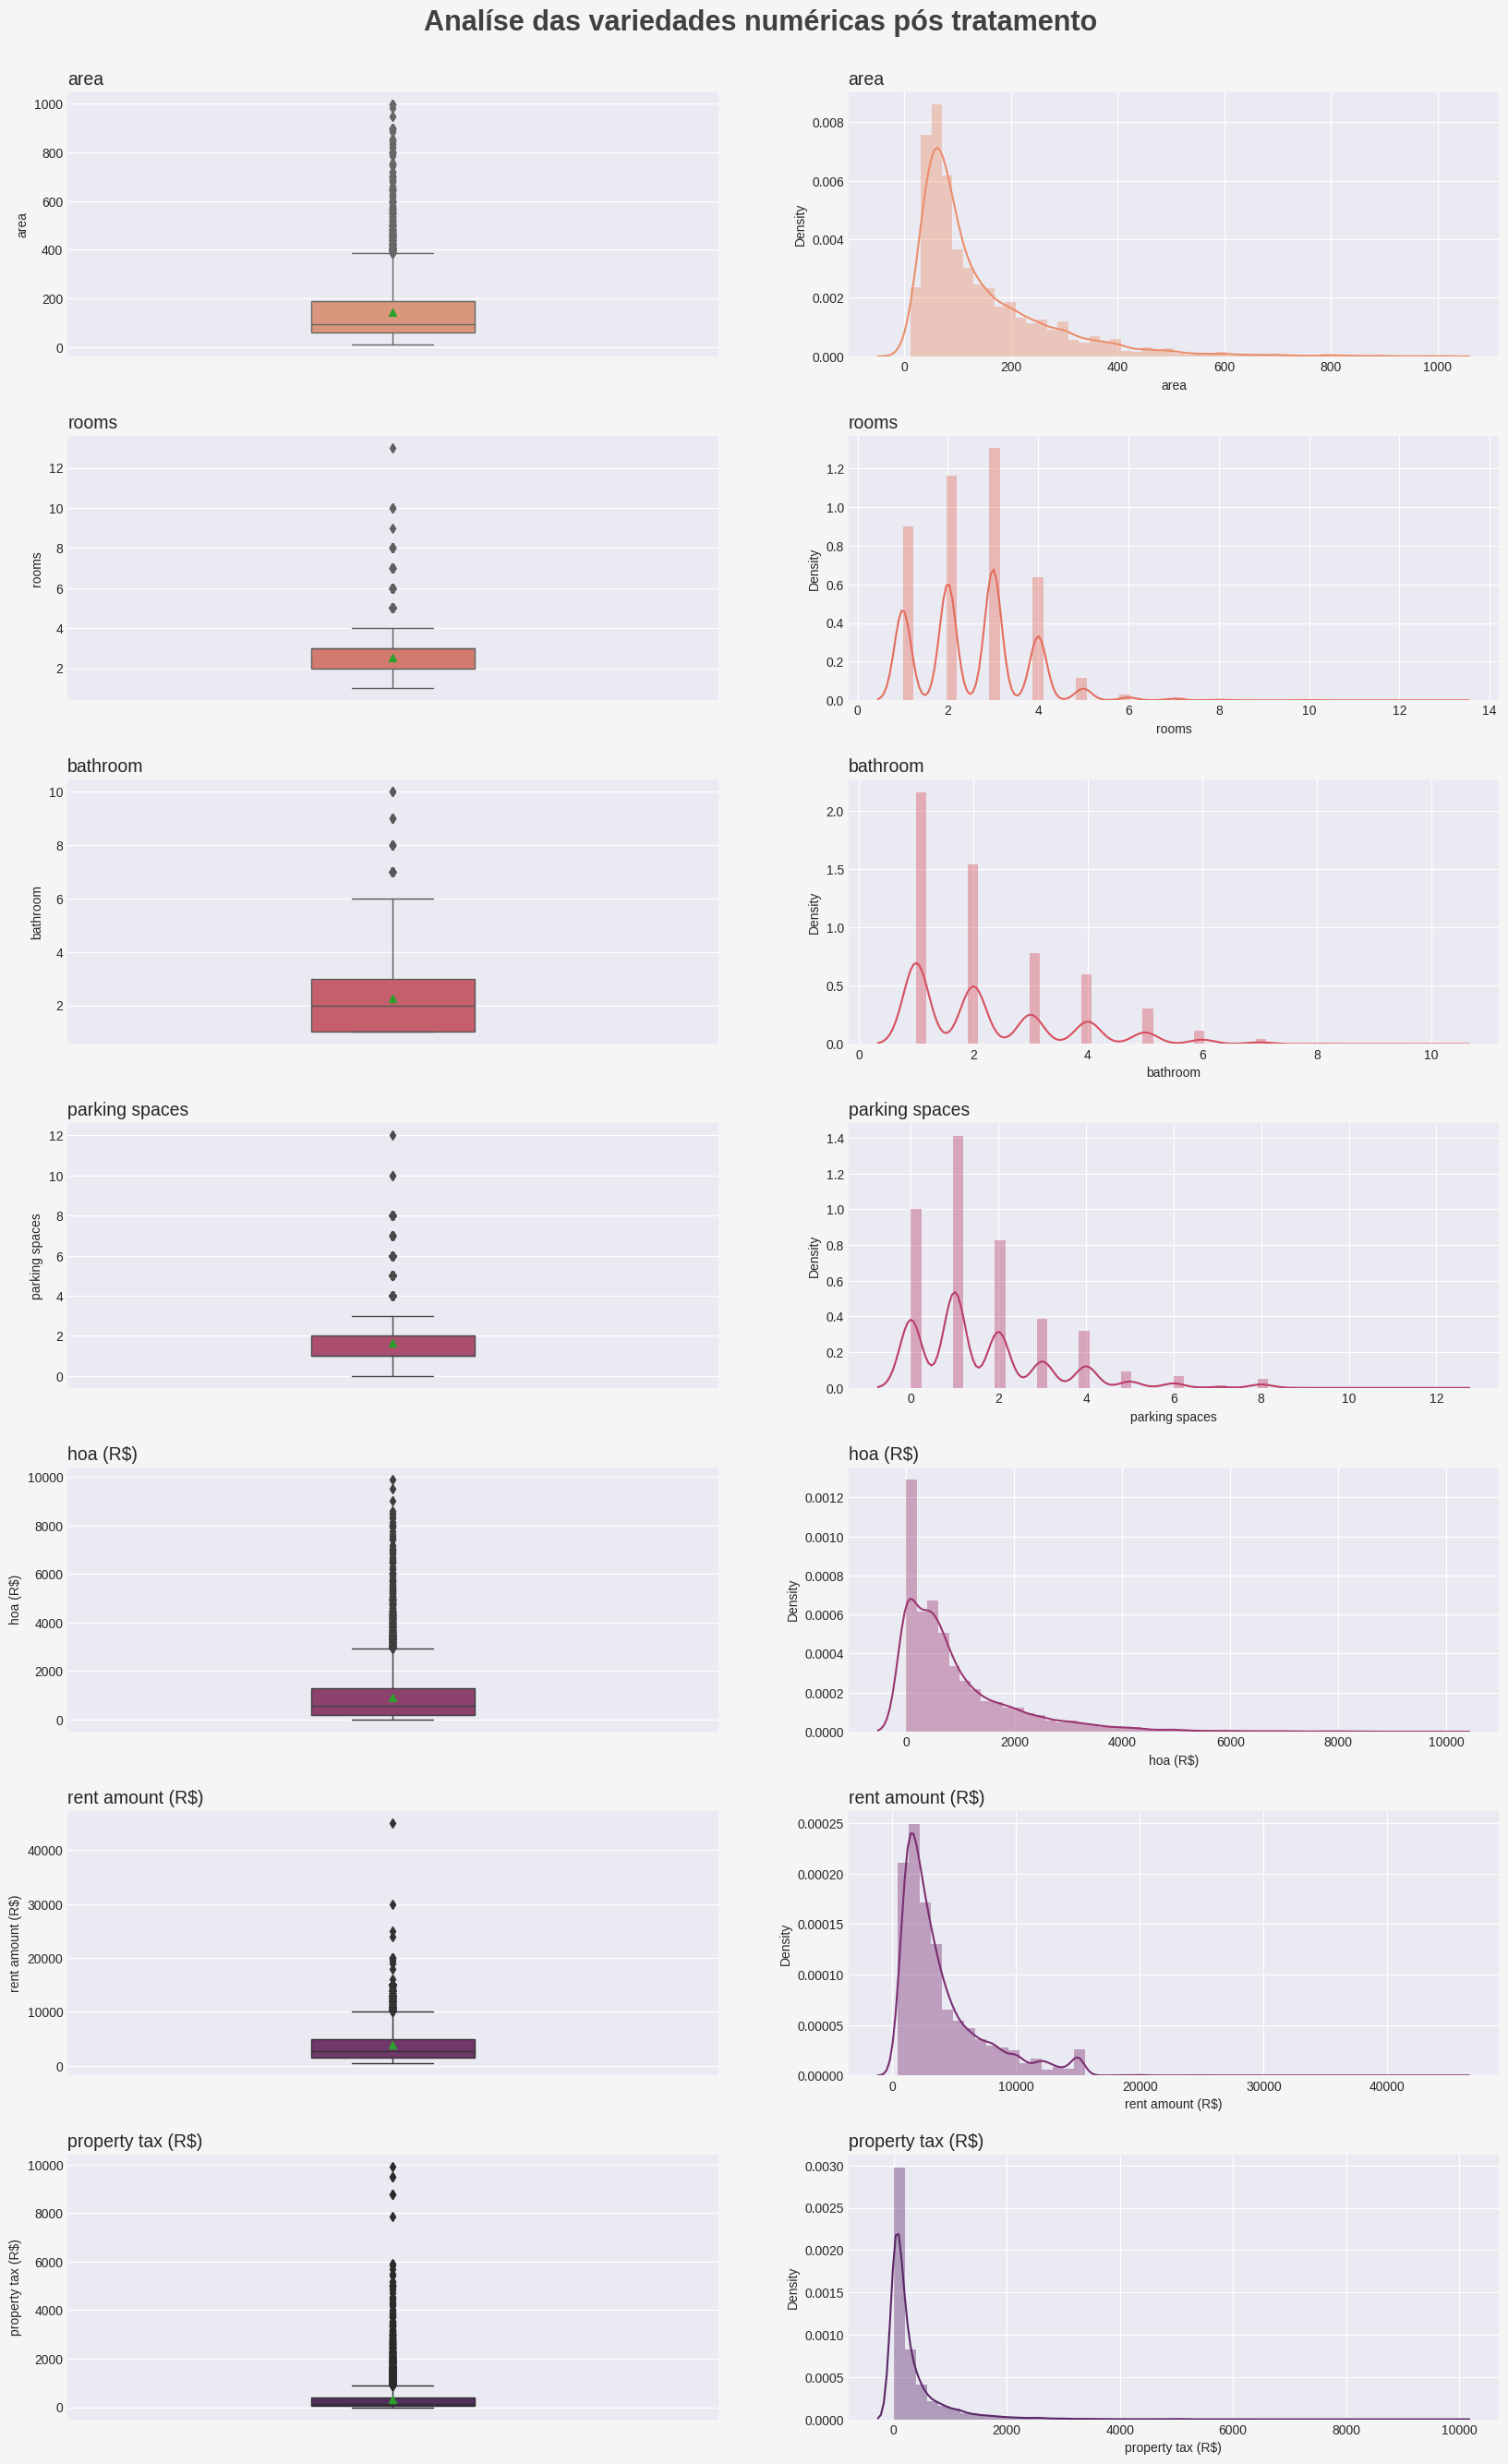

In [57]:
# Grid - gráficos

# Tamanho
figura, eixo = plt.subplots(figsize=(20, 30))

# Cor de fundo
cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

# Paleta de cores
paleta_cores = sns.color_palette('flare', len(colunas_numericas)*2)

# Titulo
plt.suptitle('Analíse das variedades numéricas pós tratamento', fontsize=22, color='#404040', fontweight=600)

# Estrutura
linhas = len(colunas_numericas)  # Todas as informações numéricas
colunas = 2  #(boxplot - distplot)
posicao = 1  # Posição inicial do grid

# For plotar os gráficos
for col in colunas_numericas:
    # plot no grid -- boxplot
    plt.subplot(linhas, colunas, posicao)
    
    # Plot
    plt.title(f'{col}', loc='left', fontsize=14, fontweight=200)
    sns.boxplot(data=dados, y=col, showmeans=True, saturation=0.75, linewidth=1, color=paleta_cores[posicao], width=0.25)
    
    # mudar a posição
    posicao += 1
    
    # plot no grid -- distplot
    plt.subplot(linhas, colunas, posicao)
    
    # Plot
    plt.title(f'{col}', loc='left', fontsize=14, fontweight=200)
    sns.distplot(dados[col], color=paleta_cores[posicao-1])
    
    # mudar a posição
    posicao += 1
    
# ajustar os grid
plt.subplots_adjust(top=0.95, hspace=0.3)

# Engenharia de features

Como vimos anteriomente, os imóveis da cidade de São Paulo concentram mais de 50% de dados, com isso, iremos nos concentrar apenas nessa parte de dados para que seja feito o treinamento do modelo.

In [58]:
# Filtrar os dados para a cidade de São Paulo

dados_SP = dados.loc[dados['city'] == 'São Paulo']

dados_SP

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735
...,...,...,...,...,...,...,...,...,...,...,...
10683,São Paulo,280,4,4,2,5,1,0,4200,4000,1042
10685,São Paulo,83,3,2,2,11,1,0,888,7521,221
10686,São Paulo,150,3,3,2,8,0,1,0,13500,0
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973


In [59]:
# Como a coluna city é apenas São Paulo, ela não é tão interessante, por isso, iremos excluí-la

dados_SP.drop(columns=['city'], inplace=True)

In [60]:
dados_SP

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735
...,...,...,...,...,...,...,...,...,...,...
10683,280,4,4,2,5,1,0,4200,4000,1042
10685,83,3,2,2,11,1,0,888,7521,221
10686,150,3,3,2,8,0,1,0,13500,0
10688,285,4,4,4,17,1,0,3100,15000,973


Com isso, temos um dataframe apenas de variáveis numéricas, ficando assim de acordo com o modelo que iremos utilizar para fazer o treinamento.

In [61]:
# Separando os dados em duas categórias, os dados que iram ser inputados para treinar o modelo (caracteristicas) e o que vai ser previsto após
# o treinamento (previsor)

caracteristicas = dados_SP.drop(columns=['rent amount (R$)'])
previsor = dados_SP['rent amount (R$)']

In [62]:
caracteristicas.shape, previsor.shape

((5715, 9), (5715,))

In [63]:
# Previsor

previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [64]:
# Previsor

previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [65]:
# Analisando a correlação entre cada coluna de cados

dados_SP.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.710755,0.769833,0.705304,-0.135850,0.165131,-0.026281,0.324042,0.665481,0.683668
rooms,0.710755,1.000000,0.753321,0.635130,-0.101267,0.208168,-0.085639,0.317449,0.528598,0.513863
bathroom,0.769833,0.753321,1.000000,0.697213,-0.021844,0.154941,0.010387,0.422914,0.633769,0.615103
parking spaces,0.705304,0.635130,0.697213,1.000000,-0.047820,0.160003,-0.012657,0.310423,0.565778,0.573838
floor,-0.135850,-0.101267,-0.021844,-0.047820,1.000000,-0.030507,0.147735,0.345931,0.062930,0.032089
animal,0.165131,0.208168,0.154941,0.160003,-0.030507,1.000000,-0.069969,0.038275,0.102140,0.102427
furniture,-0.026281,-0.085639,0.010387,-0.012657,0.147735,-0.069969,1.000000,0.109348,0.157229,0.004826
hoa (R$),0.324042,0.317449,0.422914,0.310423,0.345931,0.038275,0.109348,1.000000,0.412356,0.491891
rent amount (R$),0.665481,0.528598,0.633769,0.565778,0.062930,0.102140,0.157229,0.412356,1.000000,0.581829
property tax (R$),0.683668,0.513863,0.615103,0.573838,0.032089,0.102427,0.004826,0.491891,0.581829,1.000000


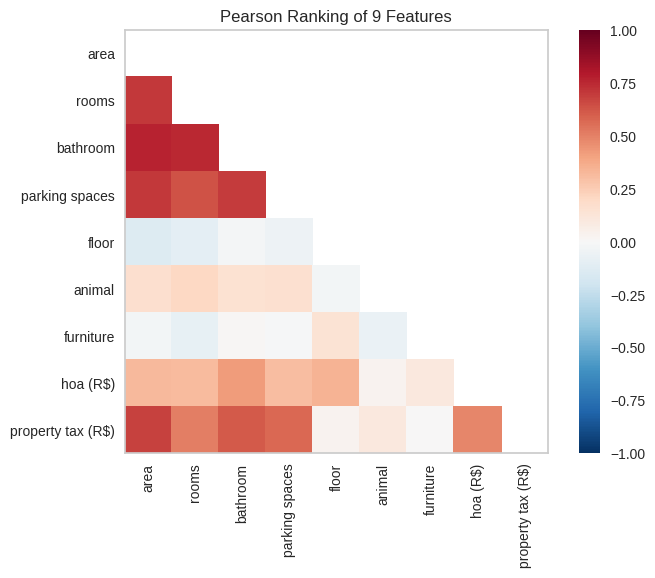

In [66]:
# Analisando a correlação gráficamente utilizando a lib 'yellowbrick'

from yellowbrick.features import Rank2D

# Definir o modelo
correlacao = Rank2D(algorithm='pearson')

# filtrar a função
correlacao.fit(caracteristicas, previsor)
correlacao.transform(caracteristicas)
correlacao.show();

Podemos observar que as variáveis área, quartos, banheiros e vagas de garagem têm grande contribuição para o preço do aluguel. Onde podemos dizer que já era um resultado esperado, pois sabemos que as pessoas levam muito em conta esses detalhes quando se procura um imóvel, sua estrutura.

#### Separando os dados em dados de treino e teste

In [67]:
# Sepatando os dados em treindo e teste
from sklearn.model_selection import train_test_split

# Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristicas, previsor, test_size=0.20, random_state=10)

In [68]:
print(f'Dados de treino: {x_treino.shape[0]}')
print(f'Dados de treino: {x_teste.shape[0]}')

Dados de treino: 4572
Dados de treino: 1143


In [69]:
# Analisado quais features são mais relevantes para o nosso modelo
# Features mais relevantes (Caso tenha alguma feature que tenha peso 0, podemos retirar do modelo)
from sklearn.feature_selection import mutual_info_regression, SelectKBest

In [70]:
# A função (mutal_info) faz uma análise de quais features tem uma relação maior com a nossa variável que queremos prever (valor de aluguel)

# Seleção de features
def selecao_features(x_treino, y_treino):
    
    # Configurar para selecionar as features
    selecao = SelectKBest(score_func=mutual_info_regression, k='all')
    
    # Filtrar o aprendizado
    selecao.fit(x_treino, y_treino)
    
    return selecao

# Aplicar a função
scores = selecao_features(x_treino, y_treino)

# Analisar
for posicao, score in enumerate(scores.scores_):
    print(f'{x_treino.columns[posicao]}: {score}')

area: 0.3062371263679413
rooms: 0.24179713350577625
bathroom: 0.3066409708617188
parking spaces: 0.20617875654081397
floor: 0.04130616085817573
animal: 0.008907517914649166
furniture: 0.03292518413248935
hoa (R$): 0.1448932938649845
property tax (R$): 0.16041228161066545


Quanto maior o valor do score, maior a relação com o valor da variável que queremos prever.

Como já tinhamos visto no gráfico de correlação (feito com a biblioteca yellowbrick), a área, o número de quarto, de banheiro e de vagas para estacionamento são os maiores valores, ou seja, são as variáveis que contribuem mais com  a variável valor do aluguel.

# Construção do modelo

### Utilizaremos o Modelo Random Forest Regresson

In [71]:
# Modelo Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor

# Instânciando o modelo
modelo_floresta = RandomForestRegressor(max_depth=7)

# Fitar o modelo
modelo_floresta.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=7)

### Avaliando a perfomace do modelo

In [72]:
# Avaliar a perfomace
previsores = modelo_floresta.predict(x_teste)

# Função para avaliar
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Avaliando o modelo (Erro na precisão)
print(f'RMSE: {sqrt(mean_squared_error(y_teste, previsores))}')

print(f'Score: {r2_score(y_teste, previsores)}')

RMSE: 2356.7280815079607
Score: 0.5962638221125205


Se notarmos os nossos resultados não são muitos satisfatórios, pois temos um erro muito grande e nosso modelo só consegue explicar em quese 60% os nossos dados. Mesmo tratando partes dos dados que eram outliers, ainda não foi suficiente para um bom desempenho do molelo.

### Avaliando a perfomace do modelo utilizadado a lib Yellowbrick

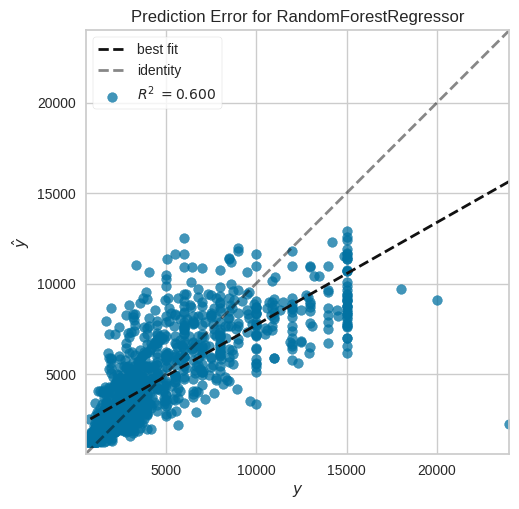

In [73]:
# Avaliando o modelo usando Yellowbrick
from yellowbrick.regressor import PredictionError

# Instanciando o modelo
modelo = RandomForestRegressor(max_depth=7)
erro_modelo = PredictionError(modelo)

# Fitar
erro_modelo.fit(x_treino, y_treino)
erro_modelo.score(x_teste, y_teste)

erro_modelo.show();

# Exportação (construindo a infraestutura da API)

In [74]:
# Exportação do modelo
import joblib

# Função
joblib.dump(modelo_floresta, 'modelo_floresta_aleatorio_v100.pkl')

['modelo_floresta_aleatorio_v100.pkl']

In [75]:
# testando o modelo treinado
funcao_modelo_carregado = joblib.load('modelo_floresta_aleatorio_v100.pkl')

In [76]:
# Testando
funcao_modelo_carregado.predict(x_teste.head(1).values)

array([5341.98705057])

In [77]:
x_teste.head(1).values

array([[ 140,    2,    2,    1,    3,    0,    0, 1882,  190]])